In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
norway = pd.read_csv('D:\\myworkspace\\ML\\norway_new_car_sales_by_make.csv')

In [14]:
norway.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [15]:
norway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
Year        4377 non-null int64
Month       4377 non-null int64
Make        4367 non-null object
Quantity    4377 non-null int64
Pct         4377 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [16]:
norway.describe()

,Year,Month,Quantity,Pct
count,4377.000000,4377.000000,4377.000000,4377.000000
mean,2011.421065,6.459904,307.802148,2.762257
std,2.906408,3.446815,411.315021,3.635185
min,2007.000000,1.000000,1.000000,0.000000
25%,2009.000000,3.000000,14.000000,0.100000
50%,2011.000000,6.000000,153.000000,1.400000
75%,2014.000000,9.000000,461.000000,4.200000
max,2017.000000,12.000000,3017.000000,22.700000


In [17]:
norway.shape

(4377, 5)

In [18]:
norway.columns

Index(['Year', 'Month', 'Make', 'Quantity', 'Pct'], dtype='object')

In [19]:
all_data_na = (norway.isnull().sum()/len(norway)) * 100
print(all_data_na)

Year        0.000000
Month       0.000000
Make        0.228467
Quantity    0.000000
Pct         0.000000
dtype: float64


In [20]:
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
print(all_data_na)

Make    0.228467
dtype: float64


In [23]:
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
print(missing_data.head(20))

      Missing Ratio
Make       0.228467


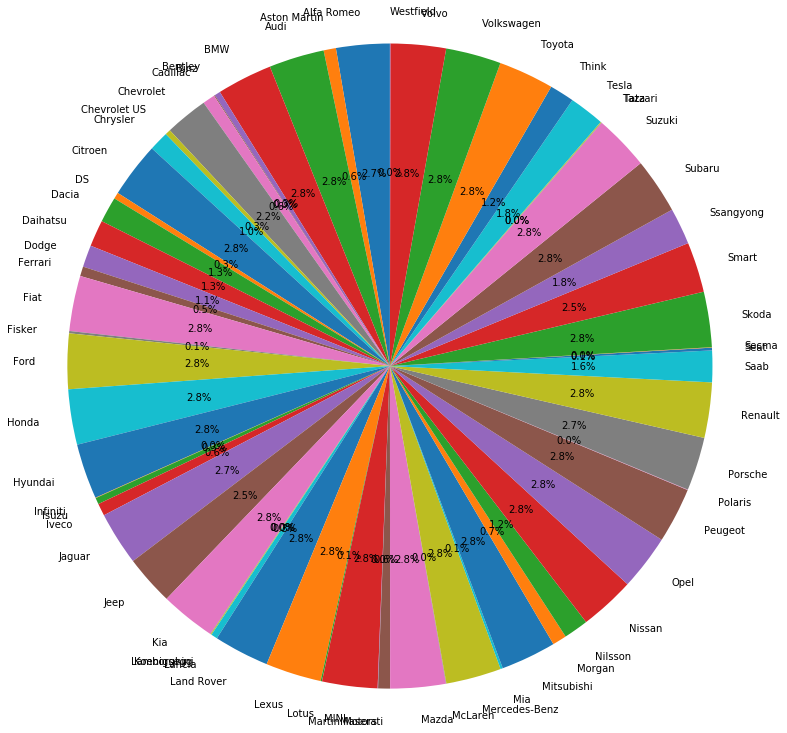

In [29]:
makes = norway.groupby(['Make']).count().index
sizes = norway.groupby(['Make']).count()['Quantity']

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=makes, autopct='%1.1f%%', shadow=False,  startangle=90)
ax.axis('equal')  
sizes
plt.tight_layout()

In [36]:
norway.Make = norway.Make.str.lower()
monthly_total_sales=norway.pivot_table("Quantity",index="Year",aggfunc="sum")
print(monthly_total_sales)

      Quantity
Year          
2007    129195
2008    110617
2009     98675
2010    127754
2011    138345
2012    137967
2013    142151
2014    144202
2015    150686
2016    154603
2017     13055


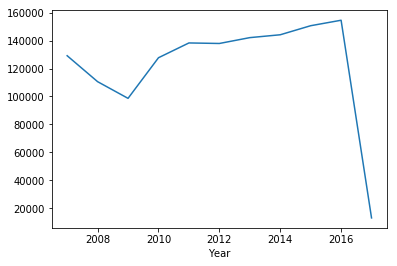

In [37]:
monthly_total_sales.mean(axis=1).plot.line()

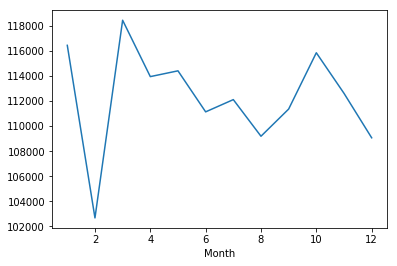

In [39]:
monthly_total_sales=norway.pivot_table("Quantity",index="Month",aggfunc="sum")
monthly_total_sales.mean(axis=1).plot.line()

               Quantity
Make                   
volkswagen       206669
toyota           168177
volvo             99937
ford              99713
bmw               73315
audi              70475
skoda             66007
nissan            64535
peugeot           61033
mercedes-benz     57557


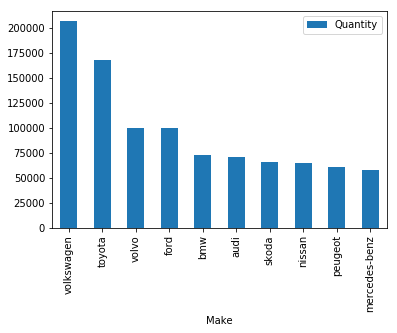

In [42]:
make_total = norway.pivot_table("Quantity", index=['Make'], aggfunc='sum')
top10make=make_total.sort_values(by='Quantity', ascending=False)[:10]
print(top10make)
top10make.plot.bar()

In [66]:
import seaborn as sns

car_list = list(norway['Make'].unique())
car_selling_quantity = []

for i in car_list:
    x = norway[norway['Make']==i]
    area_car_rate = sum(x.Pct)/len(x)
    car_selling_quantity.append(area_car_rate)

data = pd.DataFrame({'car_list': car_list,'car_selling_quantity':car_selling_quantity})

new_index = (data['car_selling_quantity'].sort_values(ascending=False)).index.values

sorted_data = data.reindex(new_index)

plt.figure(figsize=(15,10))
ax= sns.barplot(x=sorted_data['car_list'], y=sorted_data['car_selling_quantity'])
plt.xticks(rotation= 90)
plt.xlabel('Car Models')
plt.ylabel('Percentage share')
plt.title('Percentage share in Norway')


ZeroDivisionError: division by zero